###Aversarial Search - Tic Tac Toe (using python3) 
As with most of our more complex problems, we will try to make our
solution as generic as possible. In the case of adversarial search, that means making
our search algorithms non-game-specific. Let’s start by defining some simple base
classes that define all of the state our search algorithms will need. Later, we can subclass
those base classes for the specific games we are implementing (tic-tac-toe and
Connect Four) and feed the subclasses into the search algorithms to make them
“play” the games. Here are those base classes:


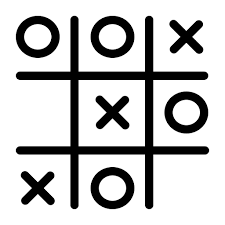

---



In [2]:
# We'll use the time module to measure the time of evaluating
# game tree in every move. It's a nice way to show the
# distinction between the basic Minimax and Minimax with
# alpha-beta pruning :)
import time

class Game_MinMax:
    def __init__(self):
        self.initialize_game()

    def initialize_game(self):
        self.current_state = [['.','.','.'],
                              ['.','.','.'],
                              ['.','.','.']]

        # Player X always plays first
        self.player_turn = 'X'

    def draw_board(self):
        for i in range(0, 3):
            for j in range(0, 3):
                print('{}|'.format(self.current_state[i][j]), end=" ")
            print()
        print()
        
    # Determines if the made move is a legal move
    def is_valid(self, px, py):
        if px < 0 or px > 2 or py < 0 or py > 2:
            return False
        elif self.current_state[px][py] != '.':
            return False
        else:
            return True
        
    #Checks if the game has ended and returns the winner in each case
    def is_end(self):
        # Vertical win
        for i in range(0, 3):
            if (self.current_state[0][i] != '.' and
                self.current_state[0][i] == self.current_state[1][i] and
                self.current_state[1][i] == self.current_state[2][i]):
                return self.current_state[0][i]

        # Horizontal win
        for i in range(0, 3):
            if (self.current_state[i] == ['X', 'X', 'X']):
                return 'X'
            elif (self.current_state[i] == ['O', 'O', 'O']):
                return 'O'

        # Main diagonal win
        if (self.current_state[0][0] != '.' and
            self.current_state[0][0] == self.current_state[1][1] and
            self.current_state[0][0] == self.current_state[2][2]):
            return self.current_state[0][0]

        # Second diagonal win
        if (self.current_state[0][2] != '.' and
            self.current_state[0][2] == self.current_state[1][1] and
            self.current_state[0][2] == self.current_state[2][0]):
            return self.current_state[0][2]

        # Is whole board full?
        for i in range(0, 3):
            for j in range(0, 3):
                # There's an empty field, we continue the game
                if (self.current_state[i][j] == '.'):
                    return None

        # It's a tie!
        return '.'
    
    # Player 'O' is max, in this case AI
    def max(self):

        # Possible values for maxv are:
        # -1 - loss
        # 0  - a tie
        # 1  - win

        # We're initially setting it to -2 as worse than the worst case:
        maxv = -2

        px = None
        py = None

        ###*** YOUR CODE HERE ***
        
        return (maxv, px, py)
    
    # Player 'X' is min, in this case human
    def min(self):

        # Possible values for minv are:
        # -1 - win
        # 0  - a tie
        # 1  - loss

        # We're initially setting it to 2 as worse than the worst case:
        minv = 2

        qx = None
        qy = None

        ###*** YOUR CODE HERE ***

        return (minv, qx, qy)
    
    def play(self):
        while True:
            self.draw_board()
            self.result = self.is_end()

            # Printing the appropriate message if the game has ended
            if self.result != None:
                if self.result == 'X':
                    print('The winner is X!')
                elif self.result == 'O':
                    print('The winner is O!')
                elif self.result == '.':
                    print("It's a tie!")

                self.initialize_game()
                return

            # If it's player's turn
            if self.player_turn == 'X':
                while True:
                    start = time.time()
                    (m, qx, qy) = self.min()
                    end = time.time()
                    print('Evaluation time: {}s'.format(round(end - start, 7)))
                    print('Recommended move: X = {}, Y = {}'.format(qx, qy))

                    px = int(input('Insert the X coordinate: '))
                    py = int(input('Insert the Y coordinate: '))

                    (qx, qy) = (px, py)

                    if self.is_valid(px, py):
                        self.current_state[px][py] = 'X'
                        self.player_turn = 'O'
                        break
                    else:
                        print('The move is not valid! Try again.')

            # If it's AI's turn
            else:
                (m, px, py) = self.max()
                self.current_state[px][py] = 'O'
                self.player_turn = 'X'

In [ ]:
def main():
    g = Game_MinMax()
    g.play()

if __name__ == "__main__":
    main()

.| .| .| 
.| .| .| 
.| .| .| 

Evaluation time: 1.9e-06s
Recommended move: X = None, Y = None


# **Alpha-Beta Pruning**

In [4]:
# We'll use the time module to measure the time of evaluating
# game tree in every move. It's a nice way to show the
# distinction between the basic Minimax and Minimax with
# alpha-beta pruning :)
import time

class Game_alpha_beta:
    def __init__(self):
        self.initialize_game()

    def initialize_game(self):
        self.current_state = [['.','.','.'],
                              ['.','.','.'],
                              ['.','.','.']]

        # Player X always plays first
        self.player_turn = 'X'

    def draw_board(self):
        for i in range(0, 3):
            for j in range(0, 3):
                print('{}|'.format(self.current_state[i][j]), end=" ")
            print()
        print()
    # Determines if the made move is a legal move
    def is_valid(self, px, py):
        if px < 0 or px > 2 or py < 0 or py > 2:
            return False
        elif self.current_state[px][py] != '.':
            return False
        else:
            return True
    #Checks if the game has ended and returns the winner in each case
    def is_end(self):
        # Vertical win
        for i in range(0, 3):
            if (self.current_state[0][i] != '.' and
                self.current_state[0][i] == self.current_state[1][i] and
                self.current_state[1][i] == self.current_state[2][i]):
                return self.current_state[0][i]

        # Horizontal win
        for i in range(0, 3):
            if (self.current_state[i] == ['X', 'X', 'X']):
                return 'X'
            elif (self.current_state[i] == ['O', 'O', 'O']):
                return 'O'

        # Main diagonal win
        if (self.current_state[0][0] != '.' and
            self.current_state[0][0] == self.current_state[1][1] and
            self.current_state[0][0] == self.current_state[2][2]):
            return self.current_state[0][0]

        # Second diagonal win
        if (self.current_state[0][2] != '.' and
            self.current_state[0][2] == self.current_state[1][1] and
            self.current_state[0][2] == self.current_state[2][0]):
            return self.current_state[0][2]

        # Is whole board full?
        for i in range(0, 3):
            for j in range(0, 3):
                # There's an empty field, we continue the game
                if (self.current_state[i][j] == '.'):
                    return None

        # It's a tie!
        return '.'
   
    def max_alpha_beta(self, alpha, beta):
            maxv = -2
            px = None
            py = None

            ###*** YOUR CODE HERE ***

            return (maxv, px, py)
        
    def min_alpha_beta(self, alpha, beta):

            minv = 2

            qx = None
            qy = None

            ###*** YOUR CODE HERE ***

            return (minv, qx, qy)
        
    def play_alpha_beta(self):
        while True:
            self.draw_board()
            self.result = self.is_end()

            if self.result != None:
                if self.result == 'X':
                    print('The winner is X!')
                elif self.result == 'O':
                    print('The winner is O!')
                elif self.result == '.':
                    print("It's a tie!")


                self.initialize_game()
                return

            if self.player_turn == 'X':

                while True:
                    start = time.time()
                    (m, qx, qy) = self.min_alpha_beta(-2, 2)
                    end = time.time()
                    print('Evaluation time: {}s'.format(round(end - start, 7)))
                    print('Recommended move: X = {}, Y = {}'.format(qx, qy))

                    px = int(input('Insert the X coordinate: '))
                    py = int(input('Insert the Y coordinate: '))

                    qx = px
                    qy = py

                    if self.is_valid(px, py):
                        self.current_state[px][py] = 'X'
                        self.player_turn = 'O'
                        break
                    else:
                        print('The move is not valid! Try again.')

            else:
                (m, px, py) = self.max_alpha_beta(-2, 2)
                self.current_state[px][py] = 'O'
                self.player_turn = 'X'

In [ ]:
def main():
    g =  Game_alpha_beta()
    g.play_alpha_beta()

if __name__ == "__main__":
    main()

.| .| .| 
.| .| .| 
.| .| .| 

Evaluation time: 0.1777532s
Recommended move: X = 0, Y = 0
Insert the X coordinate: 0
Insert the Y coordinate: 0
X| .| .| 
.| .| .| 
.| .| .| 

X| .| .| 
.| O| .| 
.| .| .| 

Evaluation time: 0.0073378s
Recommended move: X = 0, Y = 1
Insert the X coordinate: 1
Insert the Y coordinate: 0
X| .| .| 
X| O| .| 
.| .| .| 

X| .| .| 
X| O| .| 
O| .| .| 

Evaluation time: 0.0005s
Recommended move: X = 0, Y = 2
Insert the X coordinate: 1
Insert the Y coordinate: 0
The move is not valid! Try again.
Evaluation time: 0.0012109s
Recommended move: X = 0, Y = 2
Insert the X coordinate: 0
Insert the Y coordinate: 2
X| .| X| 
X| O| .| 
O| .| .| 

X| O| X| 
X| O| .| 
O| .| .| 

Evaluation time: 0.0001831s
Recommended move: X = 2, Y = 1
